In [1]:
#dependencies and importing csv
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

path = "resources/IMDB-Movie-Data.csv"

movie_data = pd.read_csv(path)

movie_data.count()

Rank                  1000
Title                 1000
Genre                 1000
Description           1000
Director              1000
Actors                1000
Year                  1000
Runtime (Minutes)     1000
Rating                1000
Votes                 1000
Revenue (Millions)     872
Metascore              936
dtype: int64

In [2]:
#Removing NA values
movie_data = movie_data.dropna()
movie_data.count()

Rank                  838
Title                 838
Genre                 838
Description           838
Director              838
Actors                838
Year                  838
Runtime (Minutes)     838
Rating                838
Votes                 838
Revenue (Millions)    838
Metascore             838
dtype: int64

In [3]:
#Initial dataframe
movie_data.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [4]:
#Making Genre a single value
for index, row in movie_data.iterrows():
   movie_data['Genre'][index] = movie_data['Genre'][index].split(',')[0]

movie_data.head()

C:\Users\littleja\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,Action,A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,Adventure,"Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,Horror,Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,Animation,"In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,Action,A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [5]:
#Summary statistics Table for entire dataset

avg_revenue = movie_data["Revenue (Millions)"].mean()
med_revenue = movie_data["Revenue (Millions)"].median()
var_revenue = movie_data["Revenue (Millions)"].var(ddof=0)
std_revenue = movie_data["Revenue (Millions)"].std(ddof=0)
sem_revenue = movie_data["Revenue (Millions)"].sem()



summary_stats_revenue = pd.DataFrame({"Average Revenue (Millions)": avg_revenue,
                                   "Median Revenue (Millions)" :med_revenue,
                                   "Revenue (Millions) Variance":var_revenue,
                                   "Revenue (Millions) Standard Deviation":std_revenue,
                                   "SEM Revenue (Millions)": sem_revenue},index=[0])
summary_stats_revenue

,Average Revenue (Millions),Median Revenue (Millions),Revenue (Millions) Variance,Revenue (Millions) Standard Deviation,SEM Revenue (Millions)
0,84.564558,48.15,10911.441385,104.457845,3.610591


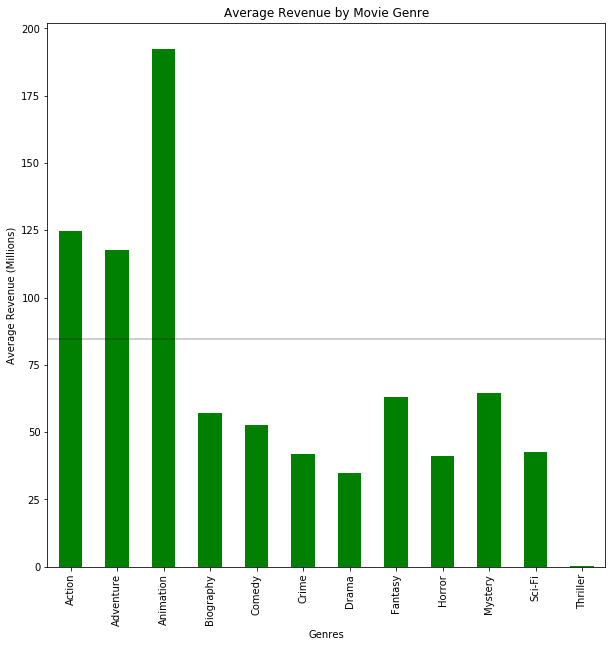

<Figure size 432x288 with 0 Axes>

In [10]:
#Charting average revenues of films by revenue
genre_grouped = movie_data.groupby("Genre")

revenue = genre_grouped["Revenue (Millions)"].mean()


fig = revenue.plot(kind='bar', color = 'g',figsize = (10,10)).get_figure()
plt.title("Average Revenue by Movie Genre")
plt.ylabel("Average Revenue (Millions)")
plt.xlabel("Genres")
plt.hlines(avg_revenue, -1, 12, alpha=0.25)

plt.show()
plt.tight_layout()
fig.savefig("images/avg_rev_genre.png")

In [ ]:
#Average earnings by runtimes
runtime_grouped = movie_data.groupby("Runtime (Minutes)")
avg_rev = runtime_grouped["Revenue (Millions)"].mean()




fig = avg_rev.plot(kind="line", color = 'g').get_figure()
plt.title("Average Revenue by Film Runtime")
plt.ylabel("Average Revenue (Millions)")
plt.xlabel("Runtimes")

plt.xlim(80,185)
plt.ylim(0,max(avg_rev)+10)

plt.show()
plt.tight_layout()
fig.savefig("images/avg_rev_runtime.png")

In [ ]:
#Scatter plot - runtimes by revenue
runtime = movie_data.loc[:,"Runtime (Minutes)"]
revenue = movie_data.loc[:,"Revenue (Millions)"]


plt.scatter(runtime,revenue, marker= 'o', alpha = .5, color = 'g')


plt.xlabel('Runtime (Minutes)')
plt.ylabel('Revenue (Millions)')
plt.title("Runtime verus Revenue")

plt.grid()
plt.show()
plt.tight_layout()

In [ ]:
#Scatter plus linear regression line/rsquared/correlation
x_values = runtime
y_values = revenue
correlation = st.pearsonr(runtime,revenue)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,marker='o',alpha=.5,color='g')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(70,150),fontsize=15,color="red")
plt.xlabel('Runtime (Minutes)')
plt.ylabel('Revenue (Millions)')
plt.title("Runtime verus Revenue")

print(f"The correlation between both factors is {round(correlation[0],2)}")
print(f"The r-squared is: {rvalue}")
plt.grid()
plt.show()
plt.tight_layout()
plt.savefig("images/rev_runtime_scatter.png")

In [ ]:
#Analyzing Revenue by IMDB Rating scores and IMDB Metascore
df=movie_data.loc[:,['Title','Rating', 'Revenue (Millions)', 'Metascore']]

df.head()

In [ ]:
#changing metascore to scale 1-10
df['Metascore']=df['Metascore']/10
df.head()

In [ ]:
#grouping by rating and getting the average revenue per rating
Rat_Rev=df.groupby('Rating').mean()['Revenue (Millions)']
#grouping by metascore and getting the average revenue per metascore
Meta_Rev=df.groupby('Metascore').mean()['Revenue (Millions)']

In [ ]:
#plotting revenue by ratings
fig=Rat_Rev.plot(kind='bar', color = 'r',figsize=(20,5)).get_figure()
plt.title("Average Revenue by Rating")
plt.ylabel("Average Revenue (Millions)")
plt.xlabel("Rating")
plt.show()
plt.tight_layout()
fig.savefig('images/Avg_Revenue_Rating.png')

In [ ]:
#plotting revenue by metascore
fig=Meta_Rev.plot(kind='bar', color = 'b',figsize=(20,5)).get_figure()
plt.title("Average Revenue by Rating")
plt.ylabel("Average Revenue (Millions)")
plt.xlabel("Rating")
plt.show()
plt.tight_layout()
fig.savefig('images/Avg_Metascore_Rating.png')

In [ ]:
#Revenue by rating scatter
Rating_df=pd.DataFrame({'Revenue per Rating':Rat_Rev})
x_axis=list(Rat_Rev.index.values.tolist())
x_values=[value for value in x_axis]
y_values = Rating_df ['Revenue per Rating']
plt.scatter(x_axis, y_values)
plt.xlabel('Rating')
plt.ylabel('Revenue')
plt.title('Revenue per Rating')
correlation = st.pearsonr(x_axis,y_values)
plt.annotate(f'correlation={round(correlation[0],2)}',(2,400),fontsize=15,color="red")
plt.savefig('images/Avg_Revenue_Rating_Scatter.png')

In [ ]:
#Revenue by Metascore 
Meta_Rev_df=pd.DataFrame({'Metascore per Rating':Meta_Rev})
x_axis=list(Meta_Rev_df.index.values.tolist())
x_values=[value for value in x_axis]
y_values = Meta_Rev_df ['Metascore per Rating']
plt.scatter(x_axis, y_values)
plt.xlabel('Metascore')
plt.ylabel('Revenue')
plt.title('Revenue per Metascore')
correlation = st.pearsonr(x_axis,y_values)
plt.annotate(f'correlation={round(correlation[0],2)}',(2,175),fontsize=15,color="red")
plt.savefig('images/Avg_Revenue_Metascore_Scatter.png')